In [1]:
import numpy as np
from scipy.linalg import ishermitian
import matplotlib.pyplot as plt
import networkx as nx
import igraph

In [74]:
sz = np.array([[1, 0], [0, -1]])
sx = np.array([[0, 1], [1, 0]])
idty = np.eye(2)

def idty_kron(front_length, back_length, operator):
    return np.kron(np.kron(np.eye(2 ** front_length), operator), np.eye(2 ** back_length))


def pxp_model(n):
    mat = np.zeros((2 ** n, 2 ** n), dtype=float)
    mat += np.kron(np.kron(np.kron(sx, idty - sz), np.eye(2 ** (n - 3))), idty - sz)
    for site in range(n - 2):
        mat += idty_kron(site, n - 3 - site, np.kron(idty - sz, np.kron(sx, idty - sz)))
    mat += np.kron(np.kron(np.kron(idty - sz, np.eye(2 ** (n - 3))), idty - sz), sx)
    return mat


def ising_model(n, h):
    mat = np.zeros((2 ** n, 2 ** n), dtype=float)
    for site in range(n - 1):
        mat += -1 * idty_kron(site, n - 2 - site, np.kron(sz, sz))
        mat += h * idty_kron(site, n - 1 - site, sx)
    mat += h * idty_kron(n - 1, 0, sx)
    return mat

# PXP model

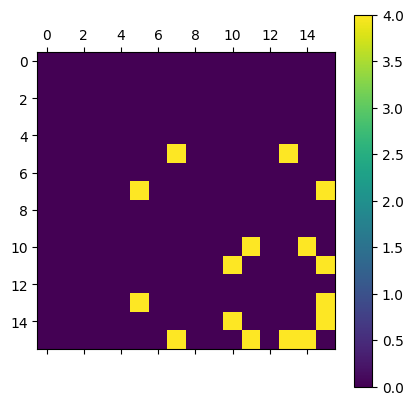

In [59]:
mat = pxp_model(4)
assert ishermitian(mat)

plt.matshow(mat)
plt.colorbar()

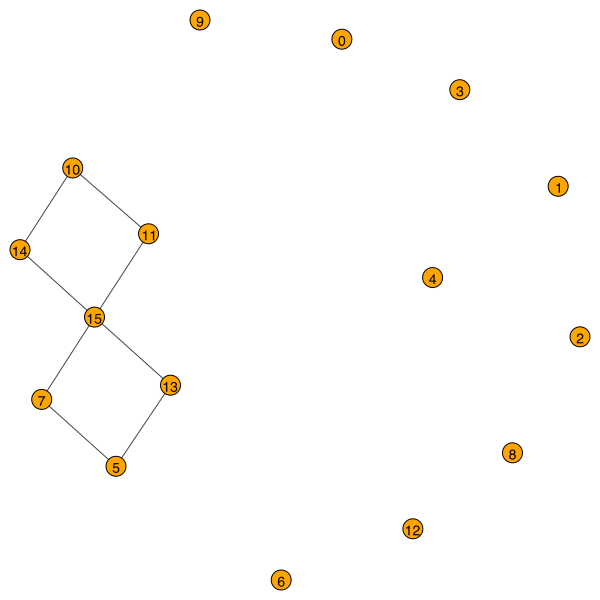

In [60]:
g = nx.from_numpy_array(mat)
ig = igraph.Graph.from_networkx(g)
ig.vs["label"] = [str(i) for i in range(ig.vcount())]
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    # vertex_size=8,
    vertex_color="orange",
    # edge_width=0.4,
    # edge_color="darkgray",
    # vertex_label_size=6,
    inline=True
)

In [61]:
sub_components = list(g.subgraph(c) for c in nx.connected_components(g))

nullity = []
for c in sub_components:
    # print(nx.is_bipartite(c))
    cmat = nx.to_numpy_array(c)
    nullity.append(cmat.shape[0] - np.linalg.matrix_rank(cmat))
    
np.unique(nullity, return_counts=True)

(array([1, 3]), array([9, 1]))

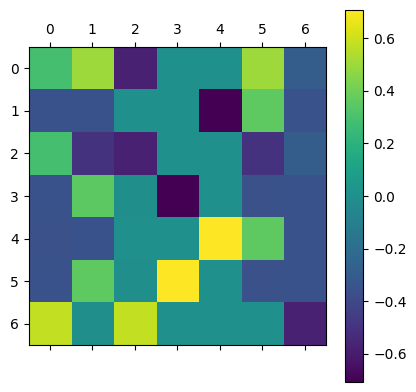

In [73]:
plt.matshow(np.linalg.eigh(nx.to_numpy_array(sub_components[5]))[1])
plt.colorbar()

(array([-9.798 , -5.6569, -0.    ,  5.6569,  9.798 ]),
 array([ 1,  1, 12,  1,  1]))

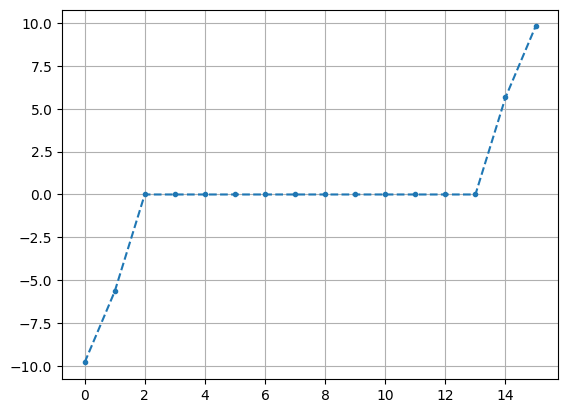

In [62]:
evals, evecs = np.linalg.eigh(mat)
plt.plot(evals, linestyle="--", marker=".")
plt.grid()

np.unique(np.round(evals, 4), return_counts=True)

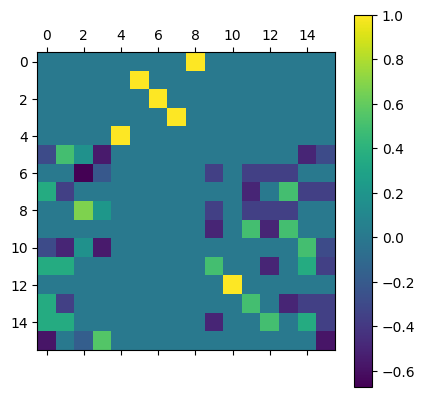

In [63]:
plt.matshow(evecs)
plt.colorbar()

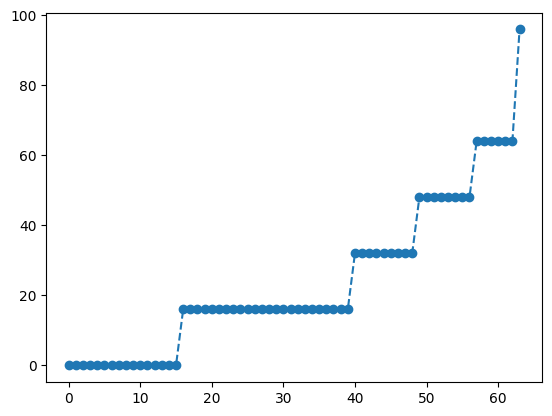

In [15]:
two_steps_mat = np.linalg.matrix_power(mat, 2)
sort_idx = np.argsort(np.diag(two_steps_mat))

plt.plot(np.diag(two_steps_mat[sort_idx, :][:, sort_idx]), linestyle="--", marker="o")
plt.show()

In [33]:
np.unique(np.diag(two_steps_mat), return_counts=True)

(array([ 0., 16., 32., 48., 64., 96.]), array([16, 24,  9,  8,  6,  1]))

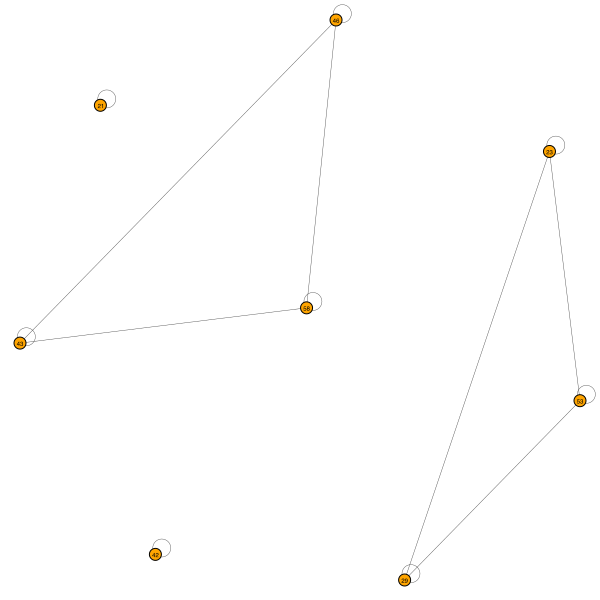

In [38]:
g = nx.from_numpy_array(two_steps_mat)
ig = igraph.Graph.from_networkx(g)
ig.vs["label"] = [str(i) for i in range(ig.vcount())]
color = ["whitesmoke" for i in range(ig.vcount())]
highlight = [
]
highlight_color = [
    # "aqua",
    # "deepskyblue",
    # "yellowgreen",
    # "tomato",
    # "royalblue"
]
for i, nodes in enumerate(highlight):
    for node in nodes:
        color[node] = highlight_color[i]
ig.vs["color"] = color
sub_ig = ig.induced_subgraph(np.where(np.diag(two_steps_mat) == 48)[0])
igraph.plot(
    sub_ig,
    layout=sub_ig.layout_kamada_kawai(),
    vertex_size=12,
    vertex_color="orange",
    edge_width=0.4,
    # edge_color="darkgray",
    vertex_label_size=6,
    inline=True
)

In [32]:
sub_g = nx.induced_subgraph(g, np.where(np.diag(two_steps_mat) == 96)[0])
sub_components = list(sub_g.subgraph(c) for c in nx.connected_components(sub_g))

for c in sub_components:
    # print(nx.is_bipartite(c))
    mat = nx.to_numpy_array(c)
    print(mat.shape[0] - np.linalg.matrix_rank(mat))

0


# Ising model

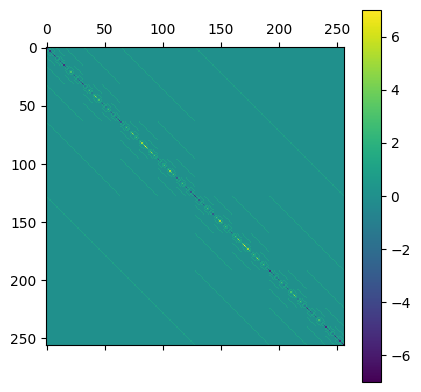

In [78]:
mat = ising_model(8, 1)
assert ishermitian(mat)

plt.matshow(mat)
plt.colorbar()

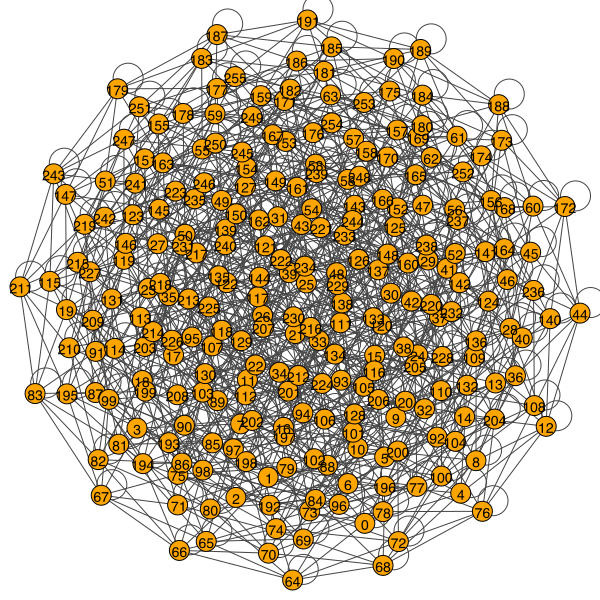

In [79]:
g = nx.from_numpy_array(mat)
ig = igraph.Graph.from_networkx(g)
ig.vs["label"] = [str(i) for i in range(ig.vcount())]
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    # vertex_size=8,
    vertex_color="orange",
    # edge_width=0.4,
    # edge_color="darkgray",
    # vertex_label_size=6,
    inline=True
)